In [2]:
#invite people for the Kaggle party
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import norm
from sklearn.preprocessing import StandardScaler
from scipy import stats
import warnings

from path import Path
warnings.filterwarnings('ignore')
%matplotlib inline

#root = Path('/home/roit/datasets/kaggle/House')
root = Path('F:/datasets/kaggle/House')
df_train = pd.read_csv(root/'train.csv')
print(df_train.columns)

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

# 观察连续数据分布

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

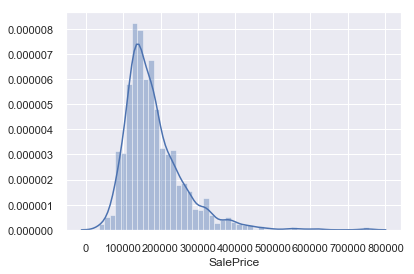

In [27]:

y=df_train['SalePrice']
sns.distplot(y)
y.describe()

# 观察一个特征数据关于另一个离散特征数据每一个类的相关

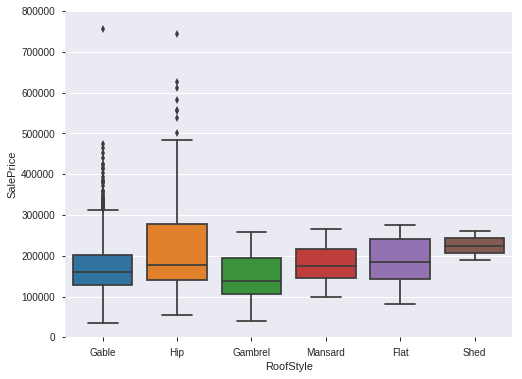

In [15]:
#box plot overallqual/saleprice
var = 'RoofStyle'#categorical(float64)
data = pd.concat([df_train['SalePrice'], df_train[var]], axis=1)
f, ax = plt.subplots(figsize=(8, 6))
fig = sns.boxplot(x=var, y="SalePrice", data=data)
fig.axis(ymin=0, ymax=800000);

# 观察数据相关矩阵

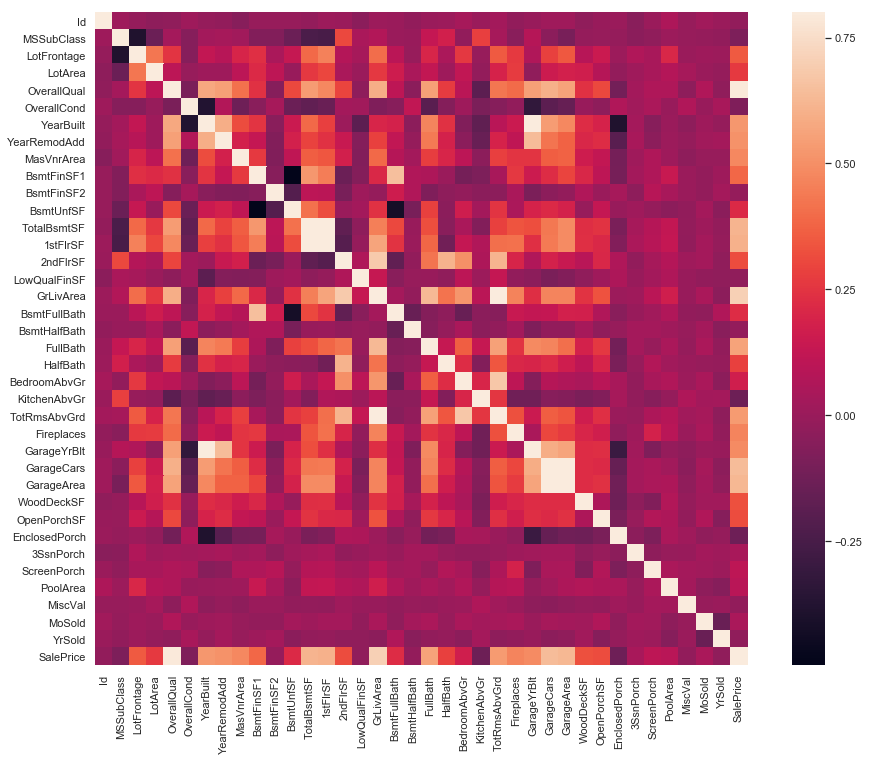

In [60]:
corrmat = df_train.corr()
f, ax = plt.subplots(figsize=(16, 12))
sns.heatmap(corrmat, vmax=.8, square=True);

# 可视化数值并选取其中几个最高相关度的

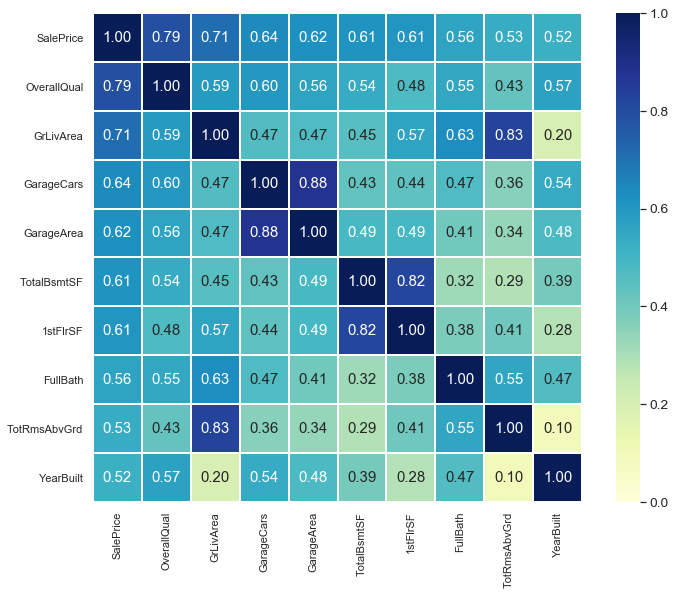

In [61]:
#saleprice correlation matrix
f, ax = plt.subplots(figsize=(12, 9))
k = 10 #number of variables for heatmap
cols = corrmat.nlargest(k, 'SalePrice')['SalePrice'].index#选择与saleprice相关度最高的10个列
cm = np.corrcoef(df_train[cols].values.T)
sns.set(font_scale=1.25)
hm = sns.heatmap(cm, 
                 vmin=0,
                 vmax=1,
                 cmap="YlGnBu",
                 cbar=True,
                 annot=True,
                 square=True,
                 fmt='.2f',
                 linewidth=1,
                 annot_kws={'size': 15},
                 yticklabels=cols.values,
                 xticklabels=cols.values)
plt.show()

In [62]:
df_train[cols]

SalePrice  OverallQual  GrLivArea  GarageCars  GarageArea  TotalBsmtSF  \
0        208500            7       1710           2         548          856   
1        181500            6       1262           2         460         1262   
2        223500            7       1786           2         608          920   
3        140000            7       1717           3         642          756   
4        250000            8       2198           3         836         1145   
...         ...          ...        ...         ...         ...          ...   
1455     175000            6       1647           2         460          953   
1456     210000            6       2073           2         500         1542   
1457     266500            7       2340           1         252         1152   
1458     142125            5       1078           1         240         1078   
1459     147500            5       1256           1         276         1256   

      1stFlrSF  FullBath  TotRmsAbvGrd  YearBuilt  
0          856         2             8       2003  
1         1262         2             6       1976  
2          920         2             6       2001  
3          961         1             7       1915  
4         1145         2             9       2000  
...        ...       ...           ...        ...  
1455       953         2             7       1999  
1456      2073         2             7       1978  
1457      1188         2             9       1941  
1458      1078         1             5       1950  
1459      1256         1             6       1965  

[1460 rows x 10 columns]

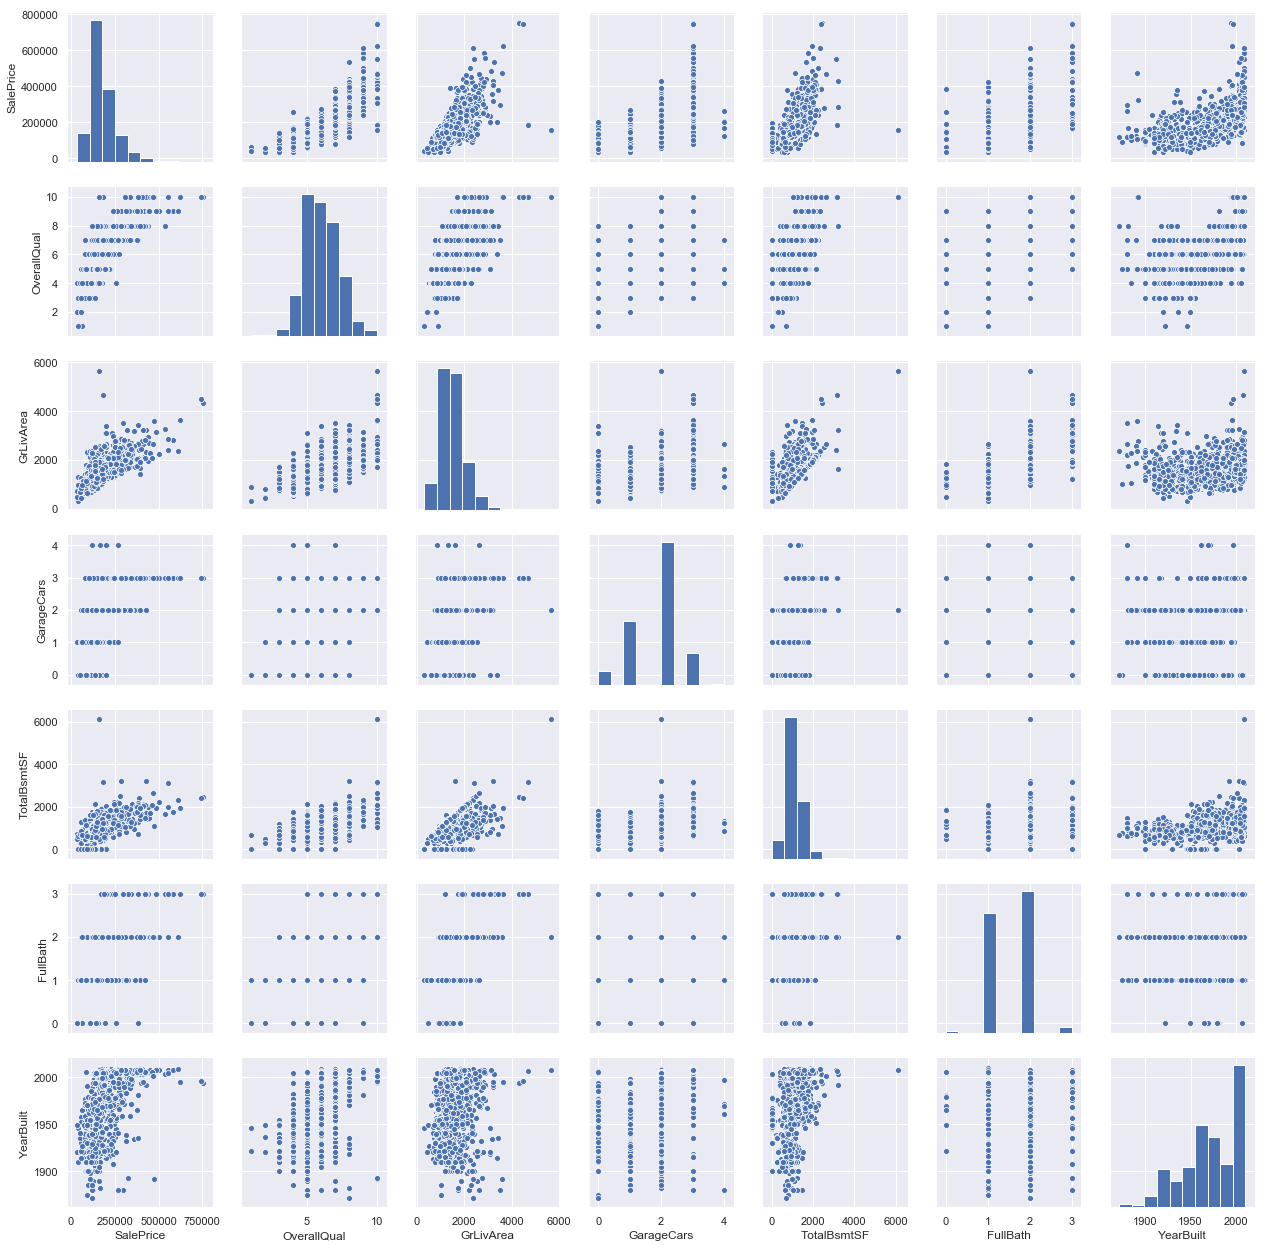

In [63]:
#scatterplot
sns.set()
cols = ['SalePrice', 'OverallQual', 'GrLivArea', 'GarageCars', 'TotalBsmtSF', 'FullBath', 'YearBuilt']
sns.pairplot(df_train[cols], size = 2.5)
plt.show();


# missing data

In [64]:
total = df_train.isnull().sum().sort_values(ascending=False)#每个特征空置数量，seriese
percent = (df_train.isnull().sum()/df_train.isnull().count()).sort_values(ascending=False)#每个特征空值比例 seriese
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])#data frame
missing_data.head(20)
#有些特征,统计量缺失率太高,如下由高到低的排名

Total   Percent
PoolQC         1453  0.995205
MiscFeature    1406  0.963014
Alley          1369  0.937671
Fence          1179  0.807534
FireplaceQu     690  0.472603
LotFrontage     259  0.177397
GarageCond       81  0.055479
GarageType       81  0.055479
GarageYrBlt      81  0.055479
GarageFinish     81  0.055479
GarageQual       81  0.055479
BsmtExposure     38  0.026027
BsmtFinType2     38  0.026027
BsmtFinType1     37  0.025342
BsmtCond         37  0.025342
BsmtQual         37  0.025342
MasVnrArea        8  0.005479
MasVnrType        8  0.005479
Electrical        1  0.000685
Utilities         0  0.000000

In [14]:
df_train.index

RangeIndex(start=0, stop=1460, step=1)

In [65]:
#standardizing data
saleprice_scaled = StandardScaler().fit_transform(df_train['SalePrice'][:,np.newaxis]);
low_range = saleprice_scaled[saleprice_scaled[:,0].argsort()][:10]
high_range= saleprice_scaled[saleprice_scaled[:,0].argsort()][-10:]
print('outer range (low) of the distribution:')
print(low_range)
print('\nouter range (high) of the distribution:')
print(high_range)

outer range (low) of the distribution:
[[-1.83870376]
 [-1.83352844]
 [-1.80092766]
 [-1.78329881]
 [-1.77448439]
 [-1.62337999]
 [-1.61708398]
 [-1.58560389]
 [-1.58560389]
 [-1.5731    ]]

outer range (high) of the distribution:
[[3.82897043]
 [4.04098249]
 [4.49634819]
 [4.71041276]
 [4.73032076]
 [5.06214602]
 [5.42383959]
 [5.59185509]
 [7.10289909]
 [7.22881942]]


# 将空值补零操作

In [66]:
for column in list(datatest[cols].columns[datatest[cols].isnull().sum() > 0]):
meanval = datatest[column].mean()
datatest[column].fillna(meanval, inplace=True)

IndentationError: expected an indented block (<ipython-input-66-db1f2e638817>, line 2)

In [10]:
# 对catergorical(string) 变量的预处理 独热编码
from sklearn.preprocessing import LabelEncoder
cols = ('FireplaceQu', 'BsmtQual', 'BsmtCond', 'GarageQual', 'GarageCond', 
        'ExterQual', 'ExterCond','HeatingQC', 'PoolQC', 'KitchenQual', 'BsmtFinType1', 
        'BsmtFinType2', 'Functional', 'Fence', 'BsmtExposure', 'GarageFinish', 'LandSlope',
        'LotShape', 'PavedDrive', 'Street', 'Alley', 'CentralAir', 'MSSubClass', 'OverallCond', 
        'YrSold', 'MoSold')
for c in cols:
    lbl = LabelEncoder() 
    lbl.fit(list(df_train[c].values)) 
    df_train[c] = lbl.transform(list(df_train[c].values))
    print(df_train[c].iloc[:10])
    
print('Shape all_data: {}'.format(df_train.shape))

0    5
1    4
2    4
3    2
4    4
5    5
6    2
7    4
8    4
9    4
Name: FireplaceQu, dtype: int64
0    2
1    2
2    2
3    3
4    2
5    2
6    0
7    2
8    3
9    3
Name: BsmtQual, dtype: int64
0    3
1    3
2    3
3    1
4    3
5    3
6    3
7    3
8    3
9    3
Name: BsmtCond, dtype: int64
0    4
1    4
2    4
3    4
4    4
5    4
6    4
7    4
8    1
9    2
Name: GarageQual, dtype: int64
0    4
1    4
2    4
3    4
4    4
5    4
6    4
7    4
8    4
9    4
Name: GarageCond, dtype: int64
0    2
1    3
2    2
3    3
4    2
5    3
6    2
7    3
8    3
9    3
Name: ExterQual, dtype: int64
0    4
1    4
2    4
3    4
4    4
5    4
6    4
7    4
8    4
9    4
Name: ExterCond, dtype: int64
0    0
1    0
2    0
3    2
4    0
5    0
6    0
7    0
8    2
9    0
Name: HeatingQC, dtype: int64
0    3
1    3
2    3
3    3
4    3
5    3
6    3
7    3
8    3
9    3
Name: PoolQC, dtype: int64
0    2
1    3
2    2
3    2
4    2
5    3
6    2
7    3
8    3
9    3
Name: KitchenQual, dtype: int64

# 数据报表查看

In [1]:
# 文件保存的方法， 就不用上面的方法了
import pandas_profiling
profile = df_train.profile_report(title='Pandas Profiling Report', plot={'histogram': {'bins': 8}})
profile.to_file(output_file="output.html")

NameError: name 'df_train' is not defined

In [3]:
# 文件保存的方法， 就不用上面的方法了
import pandas_profiling
df_train.profile_report(title='Pandas Profiling Report')

In [13]:
import numpy as np
a = np.array([[4,2], [1,3],[3,5]])
b = pd.DataFrame(a,columns=['A', 'B'])

In [14]:
b.profile_report(title='Pandas Profiling Report')